In [1]:
pip install tldextract

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tldextract
from urllib.parse import urlparse
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from urllib.parse import urlparse, unquote


In [4]:
# Define the file path
file_path = "C:/Users/aditi/Downloads/malicious_phish.csv"

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(file_path)

In [5]:
data.head() # Display the first few rows of the DataFrame

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [6]:
data.shape

(651191, 2)

In [7]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [8]:
type_counts = data['type'].value_counts()
type_counts

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

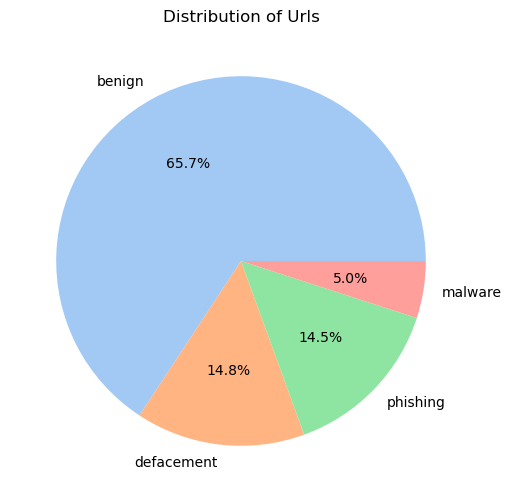

In [9]:
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Urls')
plt.show()

In [10]:
# Remove "www." from URLs and update the 'url' column
data['url'] = data['url'].str.replace('www.', '')

In [11]:
# Print the first few rows of the updated DataFrame
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [12]:
# Create a dictionary to map types to categories
type_to_category = {
    "benign": 0,
    "defacement": 1,
    "phishing": 2,
    "malware": 3
}

# Add a new 'Category' column based on the 'type' column
data['Category'] = data['type'].map(type_to_category)

In [13]:
data.head()

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1


In [14]:
# Add a new 'URL_Length' column with the length of each URL
data['URL_Length'] = data['url'].apply(len)

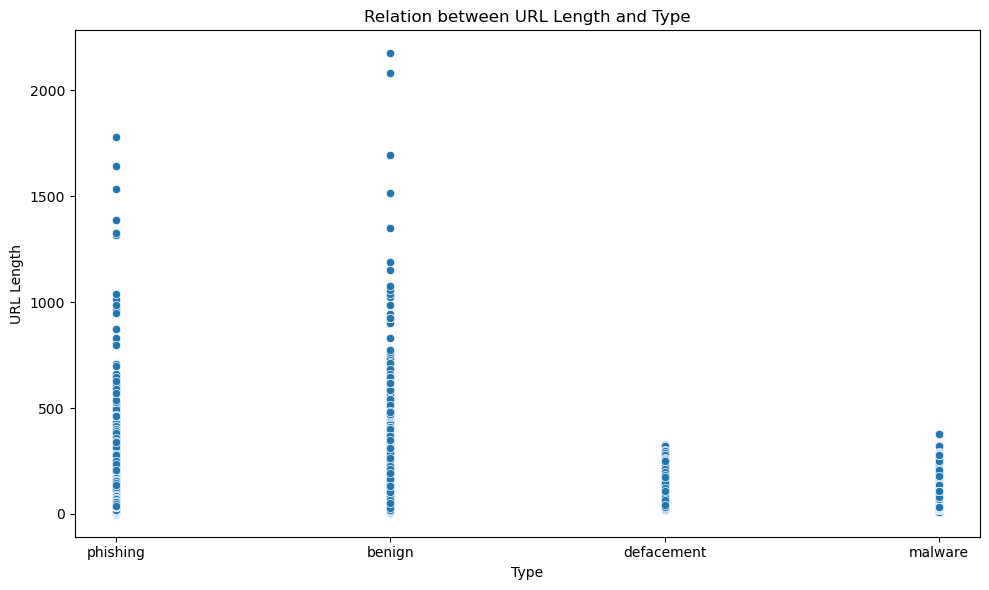

In [15]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='type', y='URL_Length')
plt.title("Relation between URL Length and Type")
plt.xlabel("Type")
plt.ylabel("URL Length")
plt.tight_layout()
plt.show()

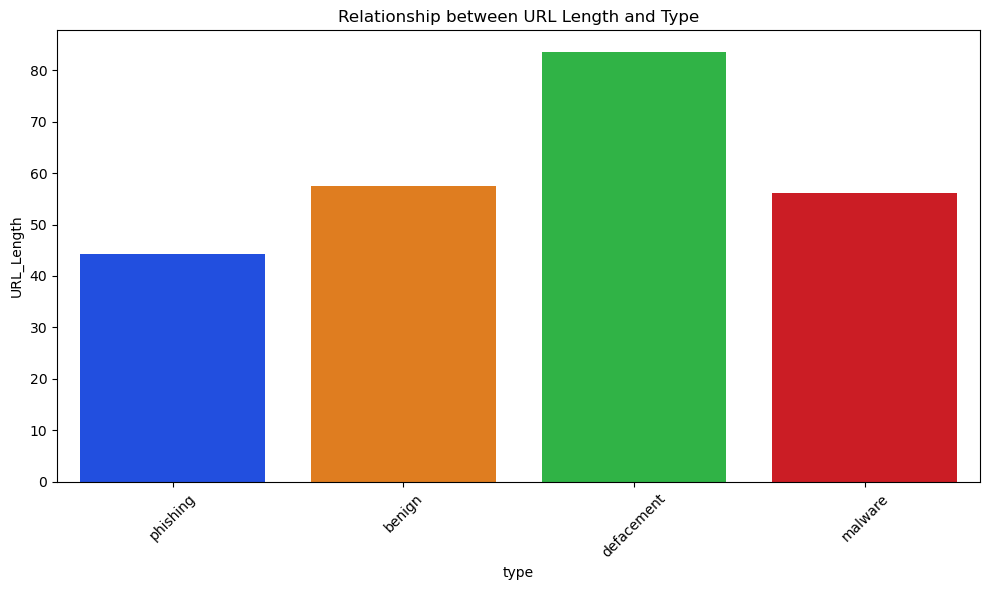

In [16]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='type', y='URL_Length',palette="bright", errorbar=None)
plt.title("Relationship between URL Length and Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


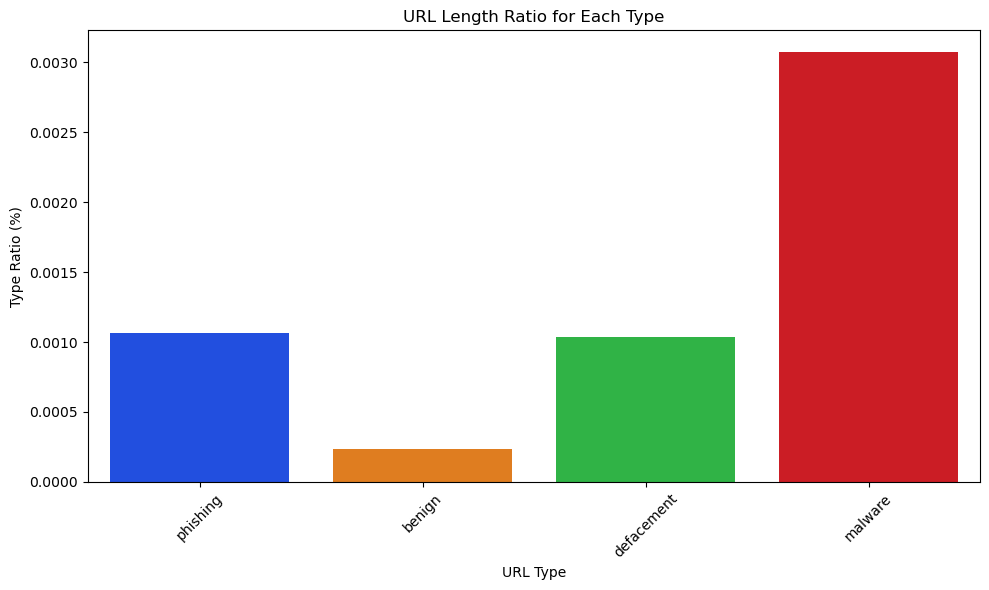

In [17]:
# Calculate the ratios for each URL type within the same type
data['type_ratio'] = data.groupby('type')['URL_Length'].transform(lambda x: x / x.sum() * 100)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='type', y='type_ratio', errorbar=None, palette='bright')
plt.title("URL Length Ratio for Each Type")
plt.ylabel("Type Ratio (%)")
plt.xlabel("URL Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
data.head()

,url,type,Category,URL_Length,type_ratio
0,br-icloud.com.br,phishing,2,16,0.000384
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916


In [19]:
# Function to extract domain from URL using tldextract
def extract_domain(url):
    extracted = tldextract.extract(url)
    return f"{extracted.domain}.{extracted.suffix}"

# Add a new 'domain' column with the extracted domain from each URL
data['domain'] = data['url'].apply(extract_domain)

In [20]:
data.head()

,url,type,Category,URL_Length,type_ratio,domain
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net


In [21]:
# List of characters to count
characters_to_count = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//']

# Function to count occurrences of a character in a URL
def count_character_occurrences(url, character):
    return url.count(character)

# Add new columns for each character and count occurrences
for character in characters_to_count:
    data[f'{character}'] = data['url'].apply(lambda url: count_character_occurrences(url, character))


In [22]:
data.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [23]:
# Function to detect if there's a match between URL and host
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

# Add a new 'Abnormal_URL' column with 1 if there's a match, 0 otherwise
data['Abnormal_URL'] = data['url'].apply(abnormal_url)

In [24]:
data.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,Abnormal_URL
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1


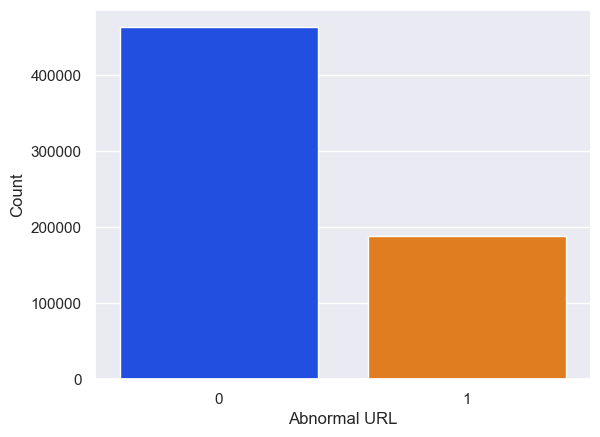

In [25]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Abnormal_URL', data=data, palette="bright")
plt.xlabel('Abnormal URL')
plt.ylabel('Count')
plt.show()

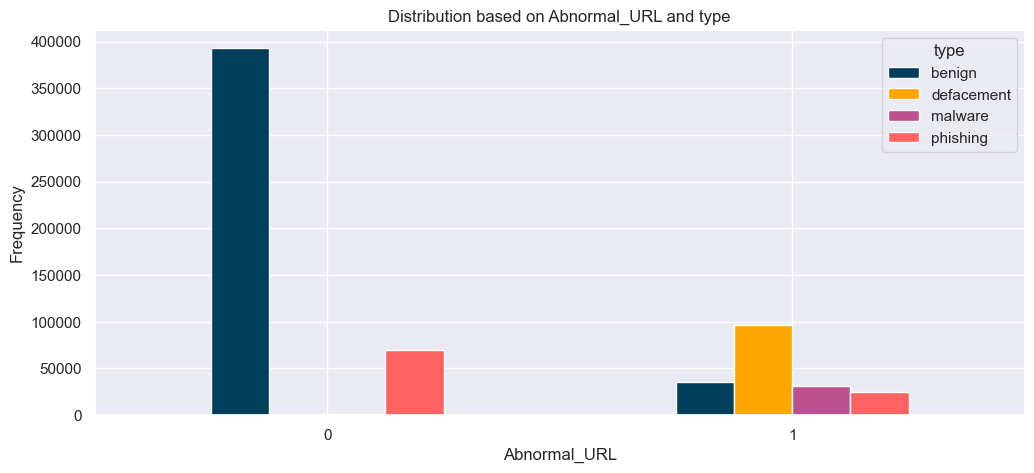

In [26]:
# Create a crosstab and plot the bar chart
pd.crosstab(data["Abnormal_URL"], data["type"]).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#bc5090','#ff6361'])
plt.title('Distribution based on Abnormal_URL and type')
plt.xlabel('Abnormal_URL')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(title="type")
plt.show()

In [27]:
# Function to detect if the URL has "https"
def has_https(url):
    return int("https" in url)

# Add a new 'Has_HTTPS' column with 1 if there's "https", 0 otherwise
data['Has_HTTPS'] = data['url'].apply(has_https)

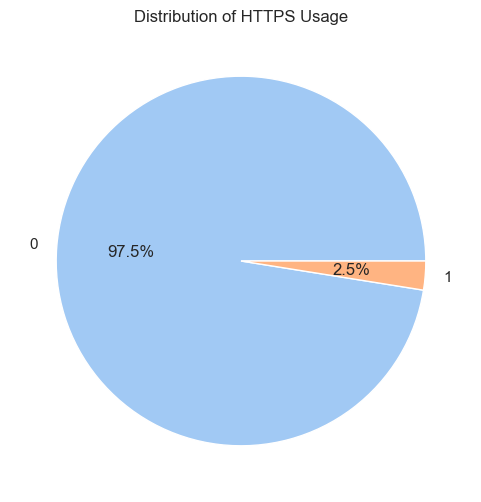

In [28]:
# Count the occurrences of each value in the "Has_HTTPS" column
https_counts = data['Has_HTTPS'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(https_counts, labels=https_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of HTTPS Usage')
plt.show()

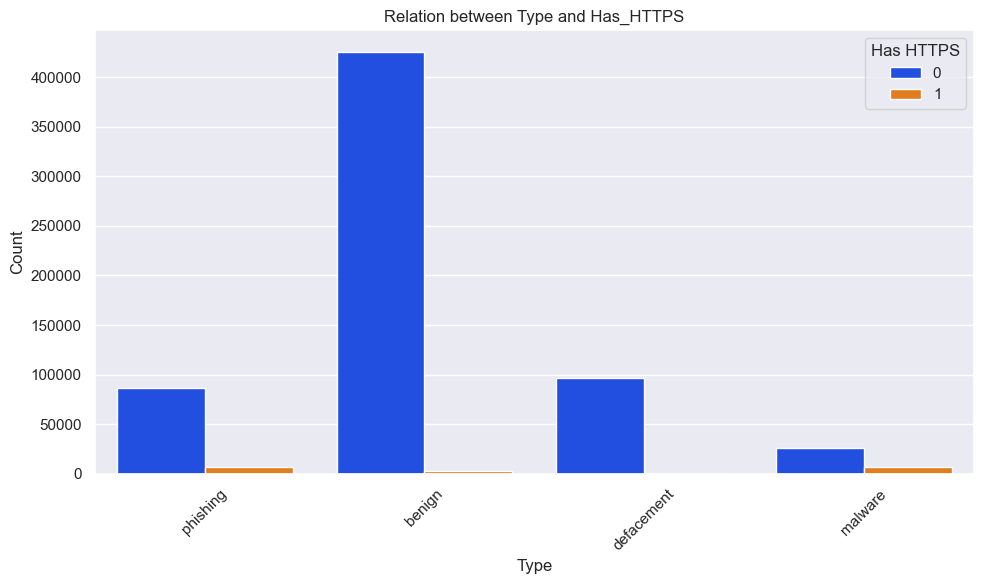

In [29]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type', hue='Has_HTTPS',palette="bright")
plt.title("Relation between Type and Has_HTTPS")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has HTTPS")
plt.tight_layout()
plt.show()

In [30]:
# Function to count the number of digits in a string
def count_digits(string):
    return sum(1 for char in string if char.isdigit())

# Function to count the number of letters in a string
def count_letters(string):
    return sum(1 for char in string if char.isalpha())

# Add new columns for digit and letter counts
data['Digit_Count'] = data['url'].apply(count_digits)
data['Letter_Count'] = data['url'].apply(count_letters)

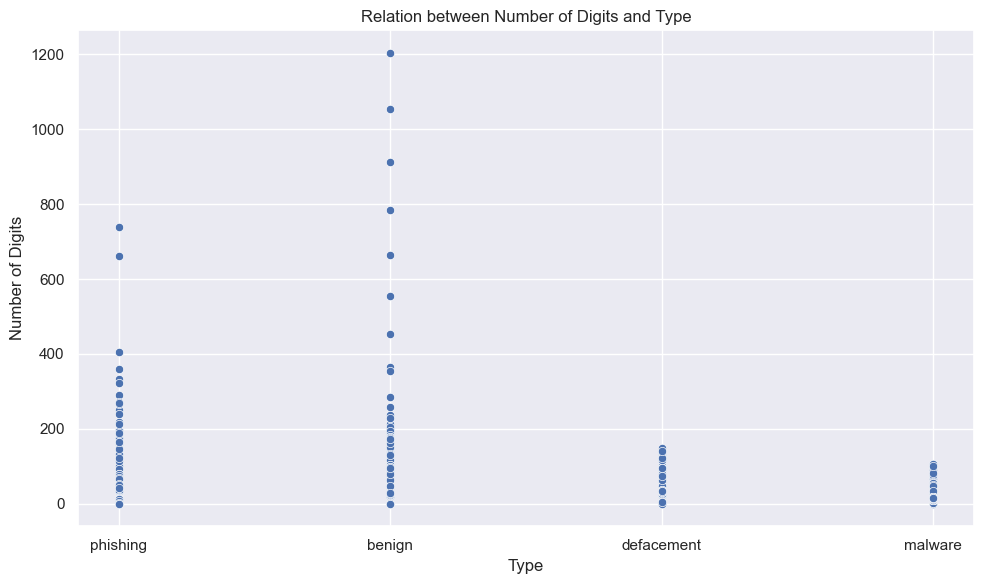

In [31]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='type', y='Digit_Count')
plt.title("Relation between Number of Digits and Type")
plt.xlabel("Type")
plt.ylabel("Number of Digits")
plt.tight_layout()
plt.show()

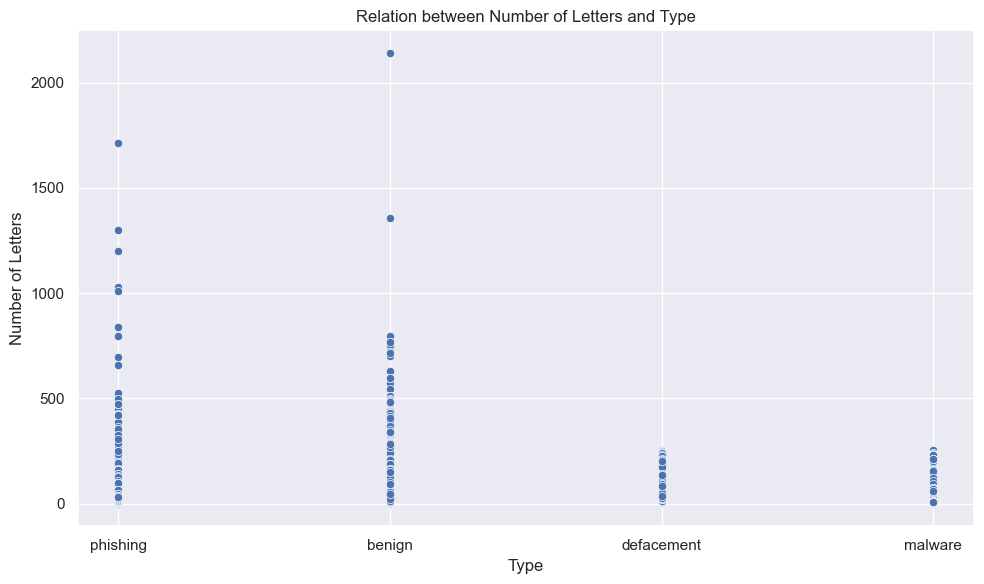

In [32]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='type', y='Letter_Count')
plt.title("Relation between Number of Letters and Type")
plt.xlabel("Type")
plt.ylabel("Number of Letters")
plt.tight_layout()
plt.show()

In [33]:
# Define the regular expression pattern for shortening services
shortening_pattern = r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|' \
                     r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|' \
                     r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|' \
                     r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|' \
                     r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|' \
                     r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|' \
                     r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|' \
                     r'tr\.im|link\.zip\.net'

# Function to detect if the URL uses a shortening service
def has_shortening_service(url):
    return int(re.search(shortening_pattern, url, flags=re.I) is not None)

# Add a new 'Has_Shortening_Service' column with 1 if it has a shortening service, 0 otherwise
data['Has_Shortening_Service'] = data['url'].apply(has_shortening_service)

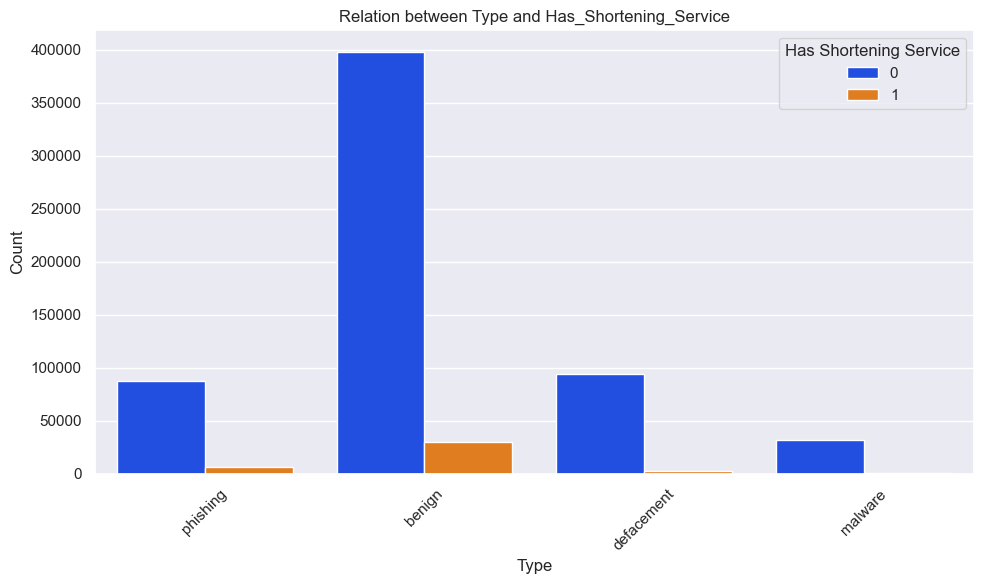

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type', hue='Has_Shortening_Service',palette='bright')
plt.title("Relation between Type and Has_Shortening_Service")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has Shortening Service")
plt.tight_layout()
plt.show()

In [35]:
data.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,...,$,!,*,",",//,Abnormal_URL,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,...,0,0,0,0,1,1,0,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,...,0,0,0,0,1,1,0,22,199,0


In [36]:
# Define the regular expression pattern to match various IP address formats
ip_pattern = (
    r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
    r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'
    r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
    r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'
    r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)'
    r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
    r'([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
    r'((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)'
)

# Function to detect if the URL has an IP address
def has_ip_address(url):
    return int(re.search(ip_pattern, url, flags=re.I) is not None)

# Add a new 'Has_IP_Address' column with 1 if it has an IP address, 0 otherwise
data['Has_IP_Address'] = data['url'].apply(has_ip_address)

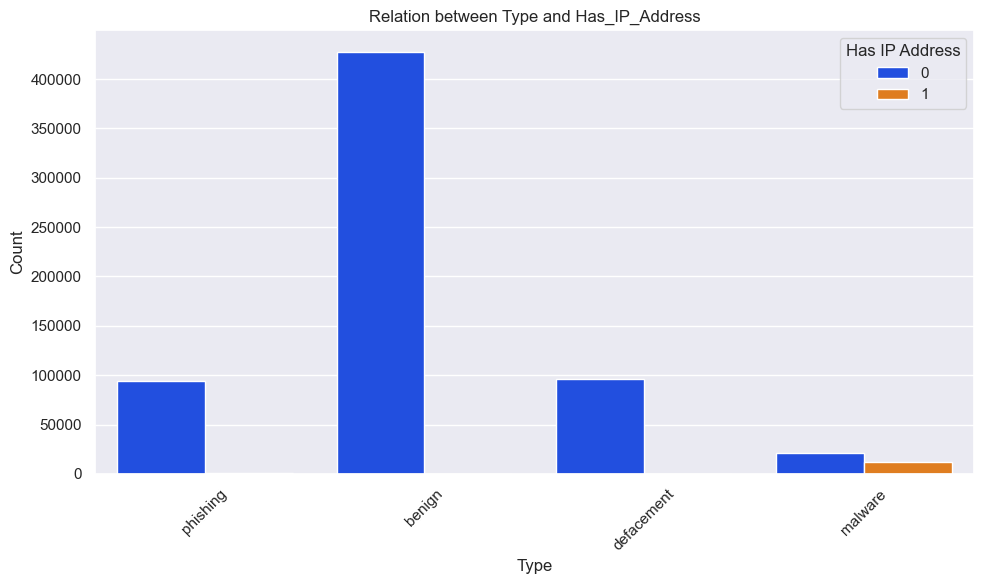

In [37]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type', hue='Has_IP_Address',palette='bright')
plt.title("Relation between Type and Has_IP_Address")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has IP Address")
plt.tight_layout()
plt.show()

In [38]:
data.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,...,!,*,",",//,Abnormal_URL,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,...,0,0,0,1,1,0,22,199,0,0


In [39]:
# Function to check for malicious code in a URL
def check_for_malicious_code(url):
    # Check for 'javascript:' in the URL
    if re.search(r'javascript:', url):
        return 1

    # Check for attempts to inject script or use 'on' attributes
    if re.search(r'<\s*script', url, re.IGNORECASE) or re.search(r'on\w*=', url, re.IGNORECASE):
        return 1

    return 0

# Add a new 'Has_Malicious_Code' column with 1 if it has malicious code, 0 otherwise
data['Has_javascript_Code'] = data['url'].apply(check_for_malicious_code)


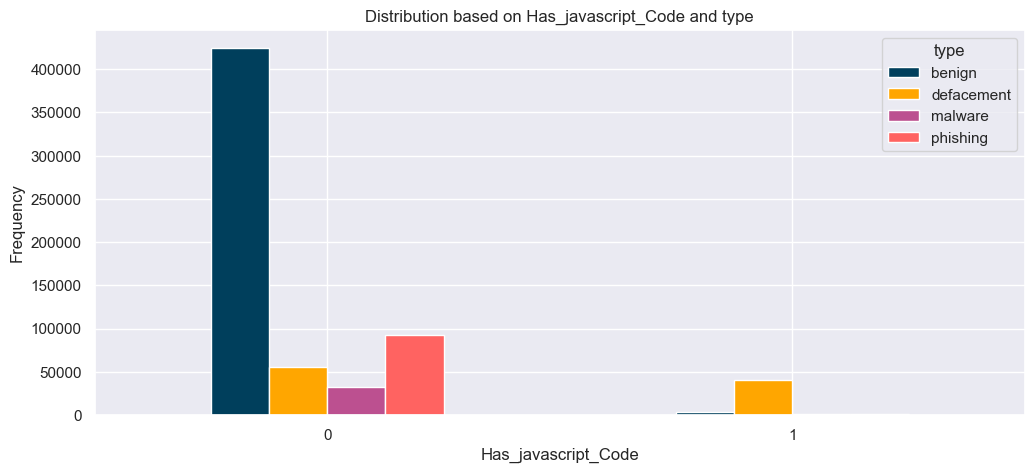

In [40]:
# Create a crosstab and plot the bar chart
pd.crosstab(data["Has_javascript_Code"], data["type"]).plot(kind="bar", figsize=(12, 5),
                                                           color=['#003f5c', '#ffa600', '#bc5090', '#ff6361'])
plt.title('Distribution based on Has_javascript_Code and type')
plt.xlabel('Has_javascript_Code')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(title="type")
plt.show()

In [41]:
data.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,...,*,",",//,Abnormal_URL,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,13,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,...,0,0,0,0,0,1,29,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,1,25,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,...,0,0,1,1,0,7,60,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,...,0,0,1,1,0,22,199,0,0,1


In [42]:
# Define the function to check text encoding
def check_text_encoding(url):
    # Parse the URL
    parsed_url = urlparse(url)

    # Extract the text part
    text_part = parsed_url.path

    # Check for encoding
    decoded_text = unquote(text_part)

    # Check if the decoded text matches the original text
    if decoded_text == text_part:
        return 0  # No encoding found
    else:
        return 1  # Encoding found

# Apply the function to the 'url' column and create a new column 'Has_Text_Encoding'
data['Has_Text_Encoding'] = data['url'].apply(check_text_encoding)



In [43]:
data.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,...,",",//,Abnormal_URL,Has_HTTPS,Digit_Count,Letter_Count,Has_Shortening_Service,Has_IP_Address,Has_javascript_Code,Has_Text_Encoding
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,13,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,...,0,0,0,0,1,29,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,...,0,0,0,0,1,25,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,...,0,1,1,0,7,60,0,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,...,0,1,1,0,22,199,0,0,1,0


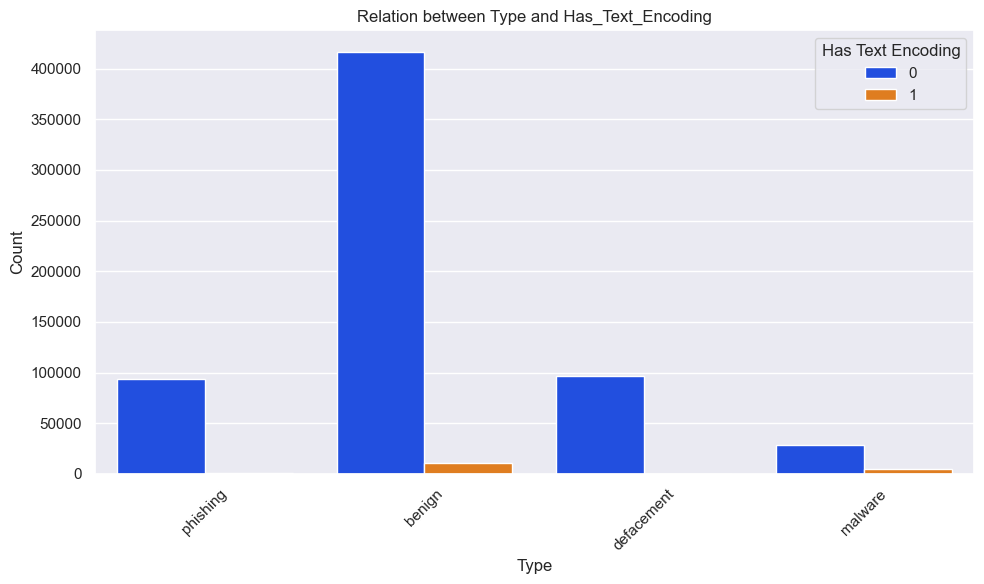

In [44]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type', hue='Has_Text_Encoding',palette='bright')
plt.title("Relation between Type and Has_Text_Encoding")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has Text Encoding")
plt.tight_layout()
plt.show()

In [45]:
data_numeric = data.select_dtypes(include=[np.number])

In [46]:
# Calculate correlations between columns
correlation_matrix = data_numeric.corr()

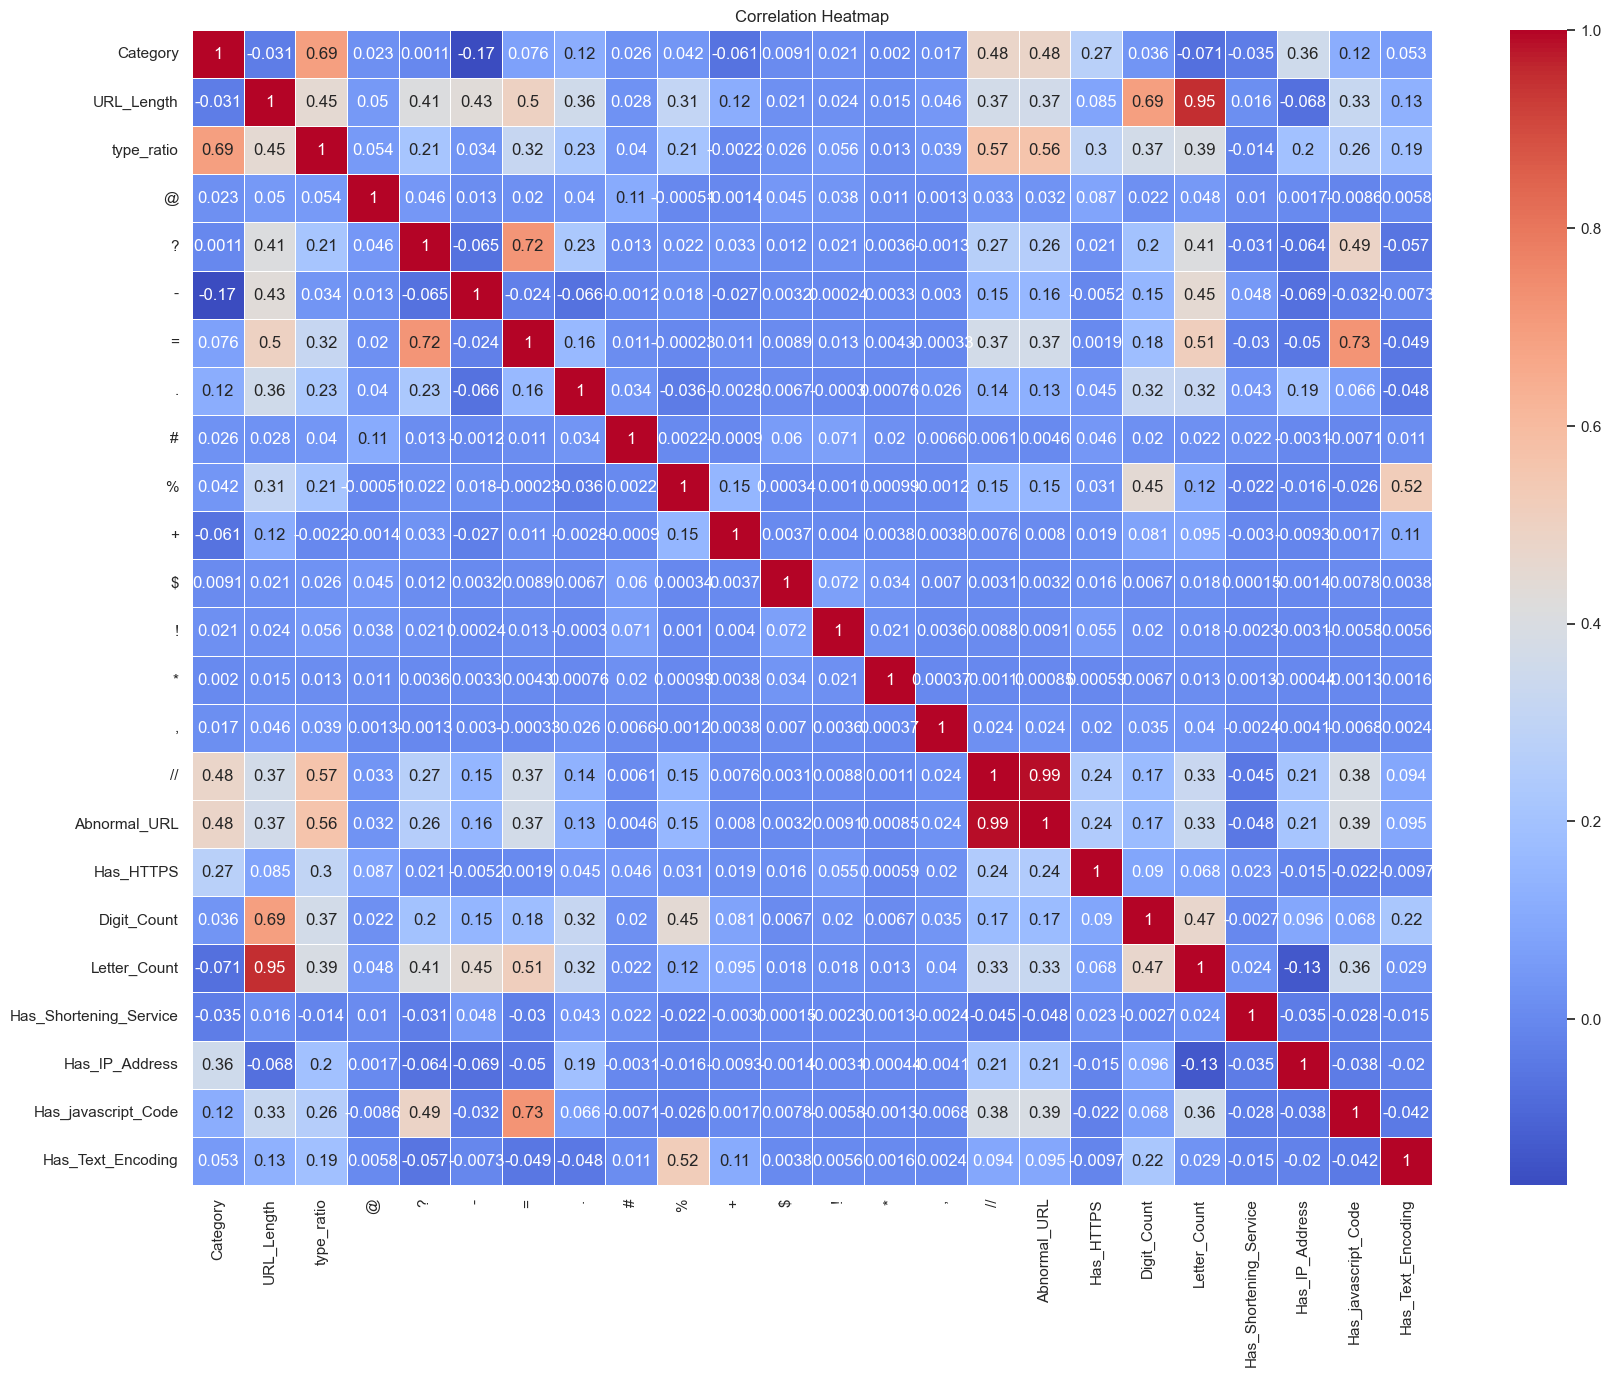

In [47]:
# Create a heatmap using Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

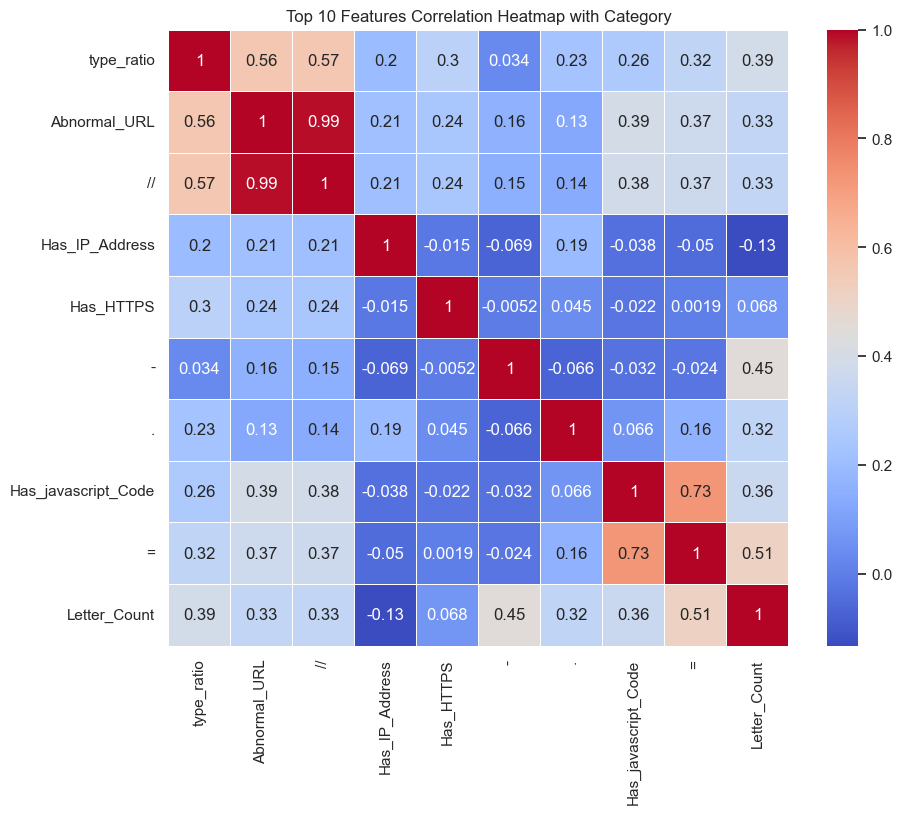

In [48]:
# Select the top 10 features related to the "Category" column
top_features = data_numeric.corr().abs()['Category'].sort_values(ascending=False)[1:11].index

# Calculate correlations for the selected features
correlation_matrix = data[top_features].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Top 10 Features Correlation Heatmap with Category")
plt.show()

In [49]:
data.isnull().sum()

url                       0
type                      0
Category                  0
URL_Length                0
type_ratio                0
domain                    0
@                         0
?                         0
-                         0
=                         0
.                         0
#                         0
%                         0
+                         0
$                         0
!                         0
*                         0
,                         0
//                        0
Abnormal_URL              0
Has_HTTPS                 0
Digit_Count               0
Letter_Count              0
Has_Shortening_Service    0
Has_IP_Address            0
Has_javascript_Code       0
Has_Text_Encoding         0
dtype: int64

In [50]:
X = data.drop(['url','type','Category','domain','type_ratio','*'],axis=1)#,'type_code'
y = data['Category']

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (520952, 21)
X_test shape: (130239, 21)
y_train shape: (520952,)
y_test shape: (130239,)


In [52]:
data.columns

Index(['url', 'type', 'Category', 'URL_Length', 'type_ratio', 'domain', '@',
       '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//',
       'Abnormal_URL', 'Has_HTTPS', 'Digit_Count', 'Letter_Count',
       'Has_Shortening_Service', 'Has_IP_Address', 'Has_javascript_Code',
       'Has_Text_Encoding'],
      dtype='object')

In [53]:
# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (520952, 21)
X_test shape: (130239, 21)
y_train shape: (520952,)
y_test shape: (130239,)


In [54]:

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9144035196830442


In [55]:
# Initialize and train the AdaBoostClassifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_ada = ada_classifier.predict(X_test)

# Calculate the accuracy of the AdaBoost model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)

AdaBoost Accuracy: 0.8092046161288093


In [56]:
# Initialize and train the SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_sgd = sgd_classifier.predict(X_test)

# Calculate the accuracy of the SGD model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("SGD Classifier Accuracy:", accuracy_sgd)

SGD Classifier Accuracy: 0.8215511482735586


In [57]:
# Initialize and train the ExtraTreesClassifier
extra_trees_classifier = ExtraTreesClassifier(random_state=42)
extra_trees_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_extra_trees = extra_trees_classifier.predict(X_test)

# Calculate the accuracy of the ExtraTrees model
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print("ExtraTrees Classifier Accuracy:", accuracy_extra_trees)

ExtraTrees Classifier Accuracy: 0.914196208508972


In [58]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [59]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [60]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, batch_size=2)  # You can adjust the number of epochs and batch size
model.save('urlpredicter.h5')

Epoch 1/2
260476/260476 [==============================] - 1032s 4ms/step - loss: -3518485.2500 - accuracy: 0.5542
Epoch 2/2
260476/260476 [==============================] - 1014s 4ms/step - loss: -54195012.0000 - accuracy: 0.5544


C:\Users\aditi\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

4070/4070 [==============================] - 15s 4ms/step - loss: -116758600.0000 - accuracy: 0.5490
Test accuracy: 54.90%


In [62]:
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Save the model to a file
with open('urlpredector.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [63]:
with open('urlpredector.pkl', 'rb') as file:
    clf_loaded = pickle.load(file)

In [78]:
new_urls = ['https://emkei.cz/', 'https://safeweb.norton.com/']

In [79]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(new_urls)

In [80]:
def preprocess_urls(urls, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences(urls)
    padded_urls = pad_sequences(sequences, maxlen=max_length)
    return padded_urls

In [81]:
MAX_LENGTH = 21

In [82]:
padded_urls = preprocess_urls(new_urls, tokenizer, MAX_LENGTH)

In [83]:
y_pred = clf_loaded.predict(padded_urls)

C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [84]:
for url, pred in zip(new_urls, y_pred):
    print(f"URL: {url}, Prediction: {'Safe' if pred == 0 else 'Unsafe'}")

URL: https://emkei.cz/, Prediction: Unsafe
URL: https://safeweb.norton.com/, Prediction: Safe
